# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 568


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# https://openweathermap.org/current#name
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid="+ weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city #&q is used to join url and api query
    
    # Log the url, record, and set numbers
#     print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,45.12,93,100,3.44,CA,1697151723
1,port-aux-francais,-49.3500,70.2167,36.46,80,83,17.27,TF,1697151950
2,adamstown,-25.0660,-130.1015,69.60,69,97,11.83,PN,1697151951
3,waitangi,-43.9535,-176.5597,54.82,71,53,5.01,NZ,1697151951
4,el salto,20.3333,-104.5000,69.30,79,71,1.90,MX,1697151952


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,45.12,93,100,3.44,CA,1697151723
1,port-aux-francais,-49.3500,70.2167,36.46,80,83,17.27,TF,1697151950
2,adamstown,-25.0660,-130.1015,69.60,69,97,11.83,PN,1697151951
3,waitangi,-43.9535,-176.5597,54.82,71,53,5.01,NZ,1697151951
4,el salto,20.3333,-104.5000,69.30,79,71,1.90,MX,1697151952


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

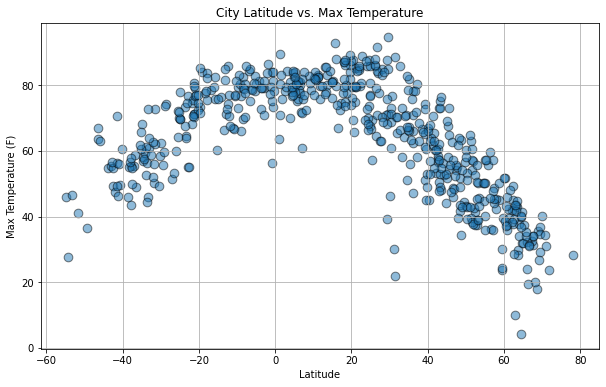

In [8]:
# Set a size for all figures
from matplotlib import rc_params as rc_params
plt.rcParams['figure.figsize'] = [10, 6]

# Build scatter plot for latitude vs. temperature
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    marker="o",
    s=75,
    alpha=0.5,
    label="Cities"
)

plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

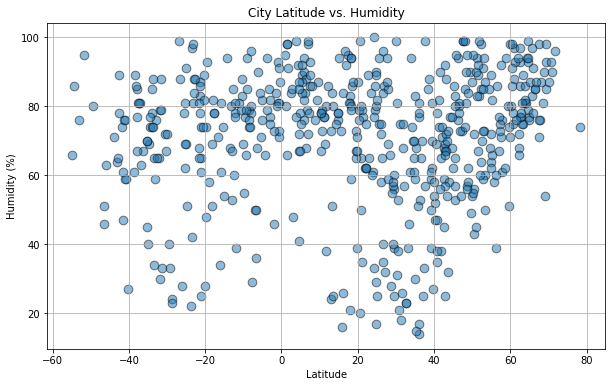

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    marker="o", 
    s=75,
    alpha=0.5,
    label="Cities"
)

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

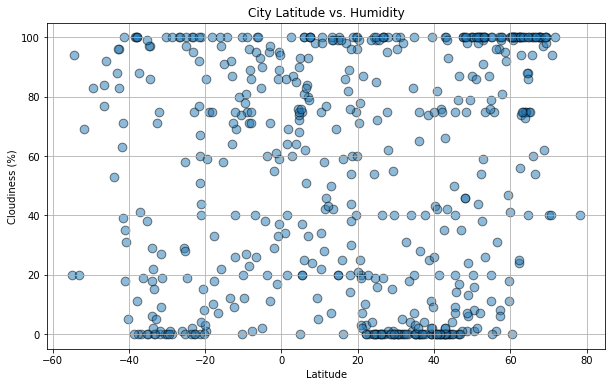

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    marker="o", 
    s=75,
    alpha=0.5,
    label="Cities"
)

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

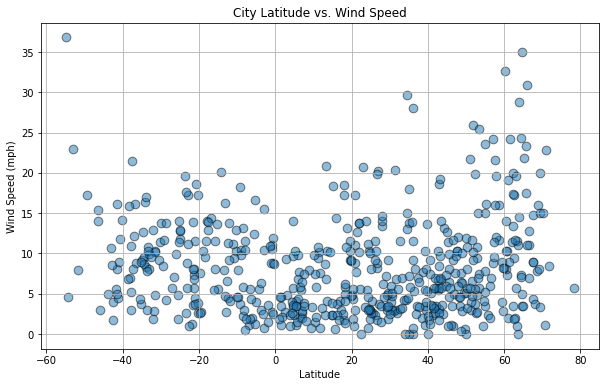

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="black",
    marker="o", 
    s=75,
    alpha=0.5,
    label="Cities"
)

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,45.12,93,100,3.44,CA,1697151723
4,el salto,20.3333,-104.5000,69.30,79,71,1.90,MX,1697151952
5,cooper's town,26.8667,-77.5167,83.66,86,100,20.22,BS,1697151953
6,magdagachi,53.4500,125.8000,45.64,60,26,7.45,RU,1697151953
7,dalandzadgad,43.5708,104.4250,48.13,32,0,6.87,MN,1697151953


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,36.46,80,83,17.27,TF,1697151950
2,adamstown,-25.0660,-130.1015,69.60,69,97,11.83,PN,1697151951
3,waitangi,-43.9535,-176.5597,54.82,71,53,5.01,NZ,1697151951
14,vallenar,-28.5708,-70.7581,74.19,24,0,4.23,CL,1697151956
15,carnarvon,-24.8667,113.6333,77.90,51,19,12.73,AU,1697151706


In [74]:
# Define a function to create Linear Regression plots
def create_lr_plots (x,y,hemi,y_info):
    # Get LR info
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    line = slope * x + intercept
    m = str(round(slope,2))
    b = str(round(intercept,2))
    line_label = f"y = {m}x + {b}"
    
    # Plot
    plt.scatter(x,y)
    plt.plot(x, line, color='red')
    plt.xlabel("Latitude")
    plt.ylabel(y_info)
    #plt.text(3, 8, line_label, fontsize=12, color='red')
    plt.title(f"Latitide vs. {y_info} ({hemi} Hemisphere)\nR-value: {r_value**2}")
    bbox_props = dict(boxstyle='square', facecolor='white', edgecolor='black', alpha=0.7)  
    plt.figtext(0.5, 0.8, line_label, fontsize=12, color='red', bbox=bbox_props)
    plt.show()
    
    return (r_value**2)
    
    
    

In [76]:
# Function for rendering all the plots at once, including analyzing the r-values
def render_plots (north,south,y_array):
    for i in y_array:
        x = northern_hemi_df["Lat"]
        y = northern_hemi_df[i]
        y_info = i        
        create_lr_plots (x,y,"Northern",y_info)
        x = southern_hemi_df["Lat"]
        y = southern_hemi_df[i]
        rvalue = create_lr_plots (x,y,"Southern",y_info)

        if abs(rvalue) > 0.5:
            strength = "strong"
            if rvalue > 0:
                cor = "positive"
            else:
                cor = "negative"
            text = f"The plots show a {strength} {cor} correlation between latitude and {i}"
        else:
            strength = "weak to no"
            text = f"The plots show a {strength} correlation between latitude and {i}"       
        
        print(text)


###  Temperature vs. Latitude Linear Regression Plot

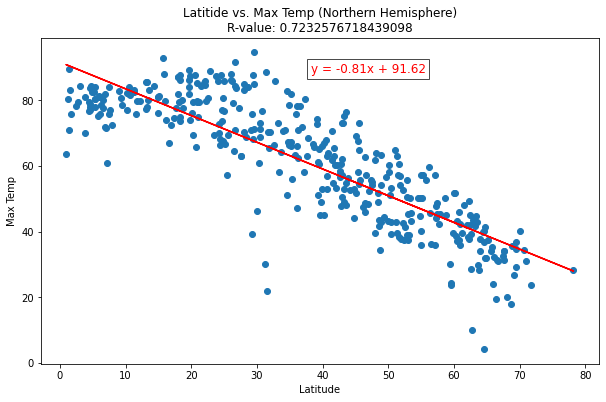

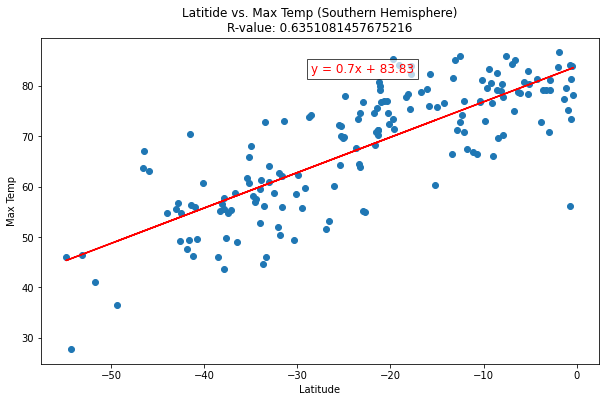

The plots show a strong positive correlation between latitude and Max Temp


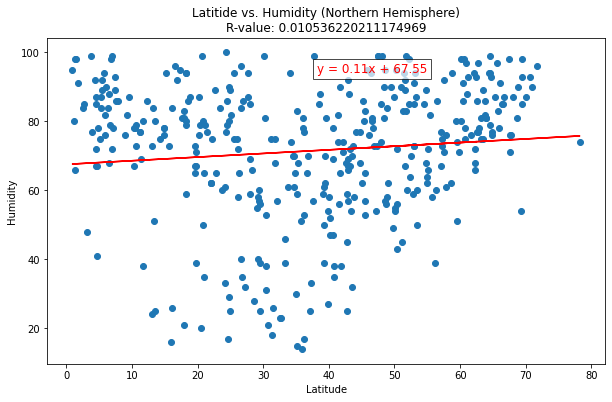

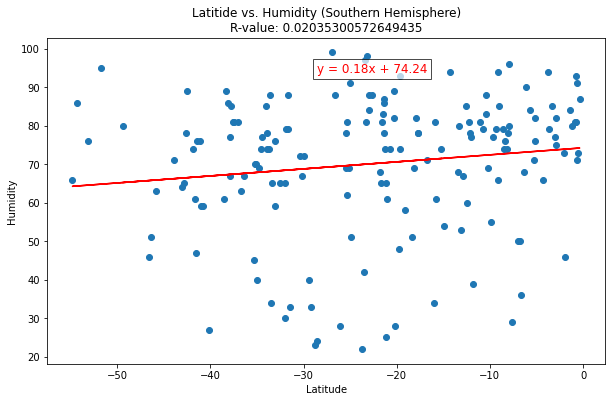

The plots show a weak to no correlation between latitude and Humidity


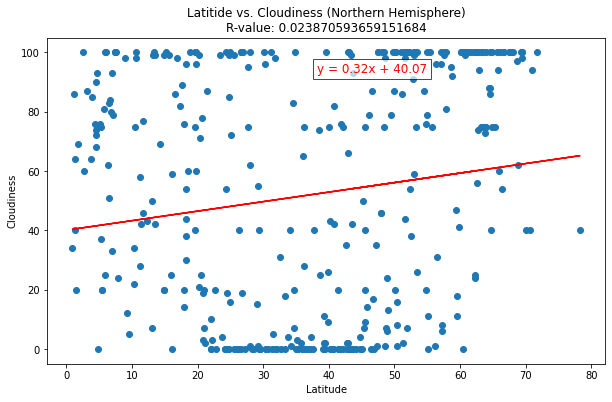

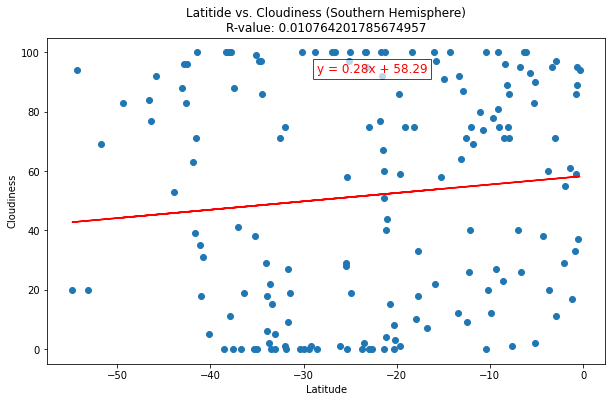

The plots show a weak to no correlation between latitude and Cloudiness


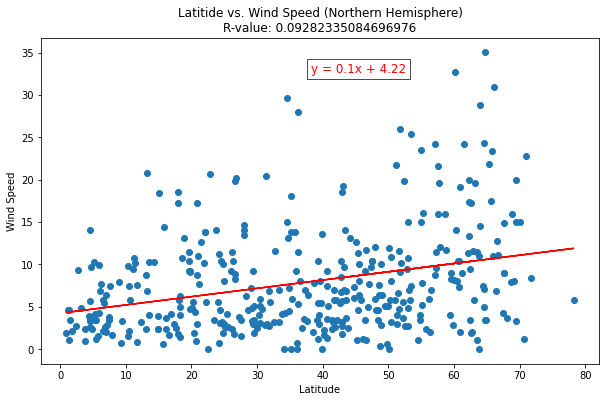

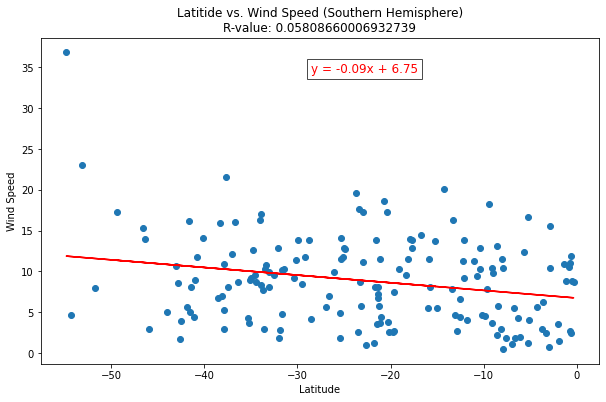

The plots show a weak to no correlation between latitude and Wind Speed


In [77]:
y_data = ["Max Temp", "Humidity","Cloudiness","Wind Speed"]
render_plots(northern_hemi_df,southern_hemi_df,y_data)